<a href="https://colab.research.google.com/github/carolinecarneiro/Trabalhos-SoulCode/blob/main/Projeto_Diversidade_e_inclus%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Escola: SoulCode Academy

Curso: Bootcamp Analista de Dados - Martech - AD2

Data de entrega: 31 de julho de 2023

Professor: Douglas Ribeiro

Aluna: Caroline Carneiro

## Informação da base de dados ##

Conjunto de dados de funcionários de uma empresa, incluindo informações confidenciais, como gênero, orientação sexual, etnia, LGBTQ e muito mais. O objetivo desse conjunto de dados é melhorar a diversidade, a equidade e a inclusão no local de trabalho.

A ideia principal da pesquisa é rastrear se os esforços da empresa para melhorar o DEI realmente funcionam e descobrir se algum grupo (vindo de diferentes origens, como gênero, etnia, orientação sexual etc.) fica para trás. A pesquisa pode ser repetida periodicamente para medir o impacto dos esforços da empresa.

**Fonte:** https://www.kaggle.com/datasets/keremkurt/diversity-equity-and-inclusion-measures-dataset

## Instalação

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import drive
from google.cloud import storage
import seaborn as sns

In [ ]:
# Executar uma vez
!pip install gcsfs
!pip install pandera


# CONFIGURANDO DA CHAVE DE SEGURANCA - ACESSO O PROJETO
serviceAccount = '/content/projetocaroline-d97bcfe4f569.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

## Conector para Cloud Storage(bucket)

In [ ]:
# Informações do arquivo do bucket a ser utilizado
client = storage.Client()
bucket = client.get_bucket('caroline_carneiro')
bucket.blob('DEI arquivo.xlsx')
path = 'gs://caroline_carneiro/Dashboard DEI/DEI arquivo.xlsx'

In [ ]:
# Extração da base de dados e guardar o backup da base de dados original como segurança
df = pd.read_excel(path)
dfback = df.copy()

## Pré-Análise

In [ ]:
df


,id,nome,sobrenome,area,gerente,genero,orientacao_sexual,LGBTQ,indigena,etnia,...,E_Neutral,E_Positive,Aug_I_Q1,Aug_I_Q2,Aug_I_Q3,Aug_I_Q4,Aug_I_Q5,I_Negative,I_Neutral,I_Positive
0,1,Deborah,Addison,IT,No,Transgender,Heterosexual,Prefer not to say,No,White,...,1,2,0,1,1,0,-2,1,2,2
1,2,Mona,Hill,Marketing,No,Male,Heterosexual,Prefer not to say,Yes,White,...,2,3,0,-1,1,1,0,1,2,2
2,3,Kimberly,Shelton,Finance,No,Female,Heterosexual,No,No,White,...,0,4,-2,2,2,0,2,1,1,3
3,4,Denis,Robinson,HR,No,Male,Heterosexual,No,No,White,...,1,3,0,2,1,0,1,0,2,3
4,5,Carmen,Gunn,RD,No,Male,Heterosexual,No,No,Asian,...,0,5,1,1,1,2,2,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Louise,Robertson,HR,No,Male,Heterosexual,No,Prefer not to say,White,...,0,4,0,2,1,2,1,0,1,4
9996,9997,Felicity,Gregory,Sales,No,Male,Heterosexual,No,No,White,...,1,4,2,0,-2,-2,-2,3,1,1
9997,9998,Abbey,Randall,Sales,No,Male,Heterosexual,No,No,White,...,0,3,0,1,2,0,2,0,2,3
9998,9999,Benny,Abbot,Finance,No,Prefer not to say,Heterosexual,No,No,White,...,0,3,1,2,1,1,2,0,0,5


In [ ]:
# Informações da base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  10000 non-null  int64         
 1   nome                10000 non-null  object        
 2   sobrenome           10000 non-null  object        
 3   area                10000 non-null  object        
 4   gerente             10000 non-null  object        
 5   genero              10000 non-null  object        
 6   orientacao_sexual   10000 non-null  object        
 7   LGBTQ               10000 non-null  object        
 8   indigena            10000 non-null  object        
 9   etnia               10000 non-null  object        
 10  pcd                 10000 non-null  object        
 11  minoria             10000 non-null  object        
 12  veterano            10000 non-null  object        
 13  data de nascimento  10000 non-null  datetime64[

In [ ]:
# Verificar a quantidade de valores Nulos, ausentes, etc
df.isna().sum()


id                    0
nome                  0
sobrenome             0
area                  0
gerente               0
genero                0
orientacao_sexual     0
LGBTQ                 0
indigena              0
etnia                 0
pcd                   0
minoria               0
veterano              0
data de nascimento    0
nacionalidade         0
Aug_D_Q1              0
Aug_D_Q2              0
Aug_D_Q3              0
Aug_D_Q4              0
Aug_D_Q5              0
D_Negative            0
D_Neutral             0
D_Positive            0
Aug_E_Q1              0
Aug_E_Q2              0
Aug_E_Q3              0
Aug_E_Q4              0
Aug_E_Q5              0
E_Negative            0
E_Neutral             0
E_Positive            0
Aug_I_Q1              0
Aug_I_Q2              0
Aug_I_Q3              0
Aug_I_Q4              0
Aug_I_Q5              0
I_Negative            0
I_Neutral             0
I_Positive            0
dtype: int64

## Transformação ##

In [ ]:
df['area'].unique()

array(['IT', 'Marketing', 'Finance', 'HR', 'RD', 'Sales', 'Operations'],
      dtype=object)

In [ ]:
#traduzindo as areas
df.loc[df.area == 'IT',['area']] = 'TI'
df.loc[df.area == 'Finance',['area']] = 'FINANCAS'
df.loc[df.area == 'HR',['area']] = 'RH'
df.loc[df.area == 'RD',['area']] = 'LOGISTICA'
df.loc[df.area == 'Sales',['area']] = 'VENDAS'
df.loc[df.area == 'Operations',['area']] = 'OPERACAO'
df.loc[df.area == 'Marketing',['area']] = 'MARKETING'

#conferindo
print(sorted(pd.unique(df['area'])))

['FINANCAS', 'LOGISTICA', 'MARKETING', 'OPERACAO', 'RH', 'TI', 'VENDAS']


In [ ]:
#traduzindo se é gerente
df.loc[df.gerente == 'No',['gerente']] = 'NAO'
df.loc[df.gerente == 'Yes',['gerente']] = 'SIM'

In [ ]:
df['gerente'].unique()

array(['NAO', 'SIM'], dtype=object)

In [ ]:
df['genero'].unique()

array(['Transgender', 'Male', 'Female', 'Prefer not to say',
       'Non-binary/non-conforming', 'Other'], dtype=object)

In [ ]:
#traduzindo genero
df.loc[df.genero == 'Transgender',['genero']] = 'TRANSEXUAL'
df.loc[df.genero == 'Male',['genero']] = 'MASCULINO'
df.loc[df.genero == 'Female',['genero']] = 'FEMININO'
df.loc[df.genero == 'Prefer not to say',['genero']] = 'PREFERE NAO RESPONDER'
df.loc[df.genero == 'Non-binary/non-conforming',['genero']] = 'NAO BINARIO/NAO CONFORME'
df.loc[df.genero == 'Other',['genero']] = 'OUTROS'

In [ ]:
df['orientacao_sexual'].unique()

array(['Heterosexual', 'Prefer not to say', 'Bisexual', 'Homosexual',
       'Other'], dtype=object)

In [ ]:
#traduzindo orientacao_sexual
df.loc[df.orientacao_sexual == 'Heterosexual',['orientacao_sexual']] = 'HETEROSEXUAL'
df.loc[df.orientacao_sexual == 'Bisexual',['orientacao_sexual']] = 'BISEXUAL'
df.loc[df.orientacao_sexual == 'Homosexual',['orientacao_sexual']] = 'HOMOSEXUAL'
df.loc[df.orientacao_sexual == 'Prefer not to say',['orientacao_sexual']] = 'PREFERE NAO RESPONDER'
df.loc[df.orientacao_sexual == 'Other',['orientacao_sexual']] = 'OUTROS'

In [ ]:
df['LGBTQ'].unique()

array(['Prefer not to say', 'No', 'Yes'], dtype=object)

In [ ]:
#traduzindo se é LGBTQ
df.loc[df.LGBTQ == 'No',['LGBTQ']] = 'NAO'
df.loc[df.LGBTQ == 'Yes',['LGBTQ']] = 'SIM'
df.loc[df.LGBTQ == 'Prefer not to say',['LGBTQ']] = 'PREFERE NAO RESPONDER'

In [ ]:
df['etnia'].unique()

array(['White', 'Asian', 'Black', 'Middle Eastern', 'Other', 'Latin',
       'Prefer not to say'], dtype=object)

In [ ]:
#traduzindo etnia
df.loc[df.etnia == 'White',['etnia']] = 'BRANCO'
df.loc[df.etnia == 'Asian',['etnia']] = 'ASIATICO'
df.loc[df.etnia == 'Black',['etnia']] = 'NEGRO'
df.loc[df.etnia == 'Middle Eastern',['etnia']] = 'ORIENTE MEDIO'
df.loc[df.etnia == 'Other',['etnia']] = 'OUTROS'
df.loc[df.etnia == 'Latin',['etnia']] = 'LATINO'
df.loc[df.etnia == 'Prefer not to say',['etnia']] = 'PREFERE NAO RESPONDER'

In [ ]:
df['minoria'].unique()

array(['No', 'Yes', 'Prefer not to say'], dtype=object)

In [ ]:
#traduzindo minoria
df.loc[df.minoria == 'No',['minoria']] = 'NAO'
df.loc[df.minoria == 'Yes',['minoria']] = 'SIM'
df.loc[df.minoria == 'Prefer not to say',['minoria']] = 'PREFERE NAO RESPONDER'

In [ ]:
df['pcd'].unique()

array(['Yes', 'No', 'Prefer not to say'], dtype=object)

In [ ]:
#traduzindo pcd
df.loc[df.pcd == 'No',['pcd']] = 'NAO'
df.loc[df.pcd == 'Yes',['pcd']] = 'SIM'
df.loc[df.pcd == 'Prefer not to say',['minoria']] = 'PREFERE NAO RESPONDER'

In [ ]:
# Retirada de colunas com problemas e/ou não utilizadas na analise
df.drop(['sobrenome','indigena','veterano','data de nascimento','nacionalidade','Aug_I_Q4','Aug_I_Q3','Aug_I_Q2','Aug_I_Q1',
         'Aug_E_Q1','Aug_D_Q4','Aug_D_Q3','Aug_D_Q2','I_Positive','I_Neutral','I_Negative'
         ],axis=1, inplace=True)

In [ ]:
# Retirada de colunas com problemas e/ou não utilizadas na analise
df.drop(['E_Positive','E_Neutral','E_Negative','D_Positive','D_Neutral','D_Negative',],axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 10000 non-null  int64 
 1   nome               10000 non-null  object
 2   area               10000 non-null  object
 3   gerente            10000 non-null  object
 4   genero             10000 non-null  object
 5   orientacao_sexual  10000 non-null  object
 6   LGBTQ              10000 non-null  object
 7   etnia              10000 non-null  object
 8   pcd                10000 non-null  object
 9   minoria            10000 non-null  object
 10  Aug_D_Q1           10000 non-null  int64 
 11  Aug_D_Q5           10000 non-null  int64 
 12  Aug_E_Q2           10000 non-null  int64 
 13  Aug_E_Q3           10000 non-null  int64 
 14  Aug_E_Q4           10000 non-null  int64 
 15  Aug_E_Q5           10000 non-null  int64 
 16  Aug_I_Q5           10000 non-null  int64 

In [ ]:
# Tabela final
df.head(10)


,id,nome,area,gerente,genero,orientacao_sexual,LGBTQ,etnia,pcd,minoria,Aug_D_Q1,Aug_D_Q5,Aug_E_Q2,Aug_E_Q3,Aug_E_Q4,Aug_E_Q5,Aug_I_Q5
0,1,Deborah,TI,NAO,TRANSEXUAL,HETEROSEXUAL,PREFERE NAO RESPONDER,BRANCO,SIM,NAO,-1,-2,-1,1,-2,1,-2
1,2,Mona,MARKETING,NAO,MASCULINO,HETEROSEXUAL,PREFERE NAO RESPONDER,BRANCO,NAO,SIM,-2,2,2,0,2,0,0
2,3,Kimberly,FINANCAS,NAO,FEMININO,HETEROSEXUAL,NAO,BRANCO,NAO,NAO,0,1,2,2,-1,2,2
3,4,Denis,RH,NAO,MASCULINO,HETEROSEXUAL,NAO,BRANCO,SIM,SIM,-2,-2,2,-2,0,1,1
4,5,Carmen,LOGISTICA,NAO,MASCULINO,HETEROSEXUAL,NAO,ASIATICO,NAO,NAO,-2,2,2,2,2,1,2
5,6,Nathan,VENDAS,NAO,MASCULINO,HETEROSEXUAL,NAO,NEGRO,NAO,NAO,-2,2,1,1,1,2,-1
6,7,Luke,MARKETING,NAO,MASCULINO,PREFERE NAO RESPONDER,SIM,BRANCO,NAO,SIM,2,0,1,2,-1,2,2
7,8,Fred,VENDAS,NAO,MASCULINO,HETEROSEXUAL,NAO,BRANCO,NAO,SIM,-2,1,-1,2,1,-2,1
8,9,Carter,FINANCAS,NAO,MASCULINO,HETEROSEXUAL,NAO,NEGRO,NAO,SIM,2,0,1,1,-1,2,2
9,10,Harry,VENDAS,NAO,MASCULINO,HETEROSEXUAL,NAO,NEGRO,NAO,NAO,-2,2,2,2,-1,1,2


## Carregamento ##

In [ ]:
# Salva no bucket
df.to_csv('gs://caroline_carneiro/Dashboard DEI/DEI_tratado.csv', index=False)

## Dashboard ##

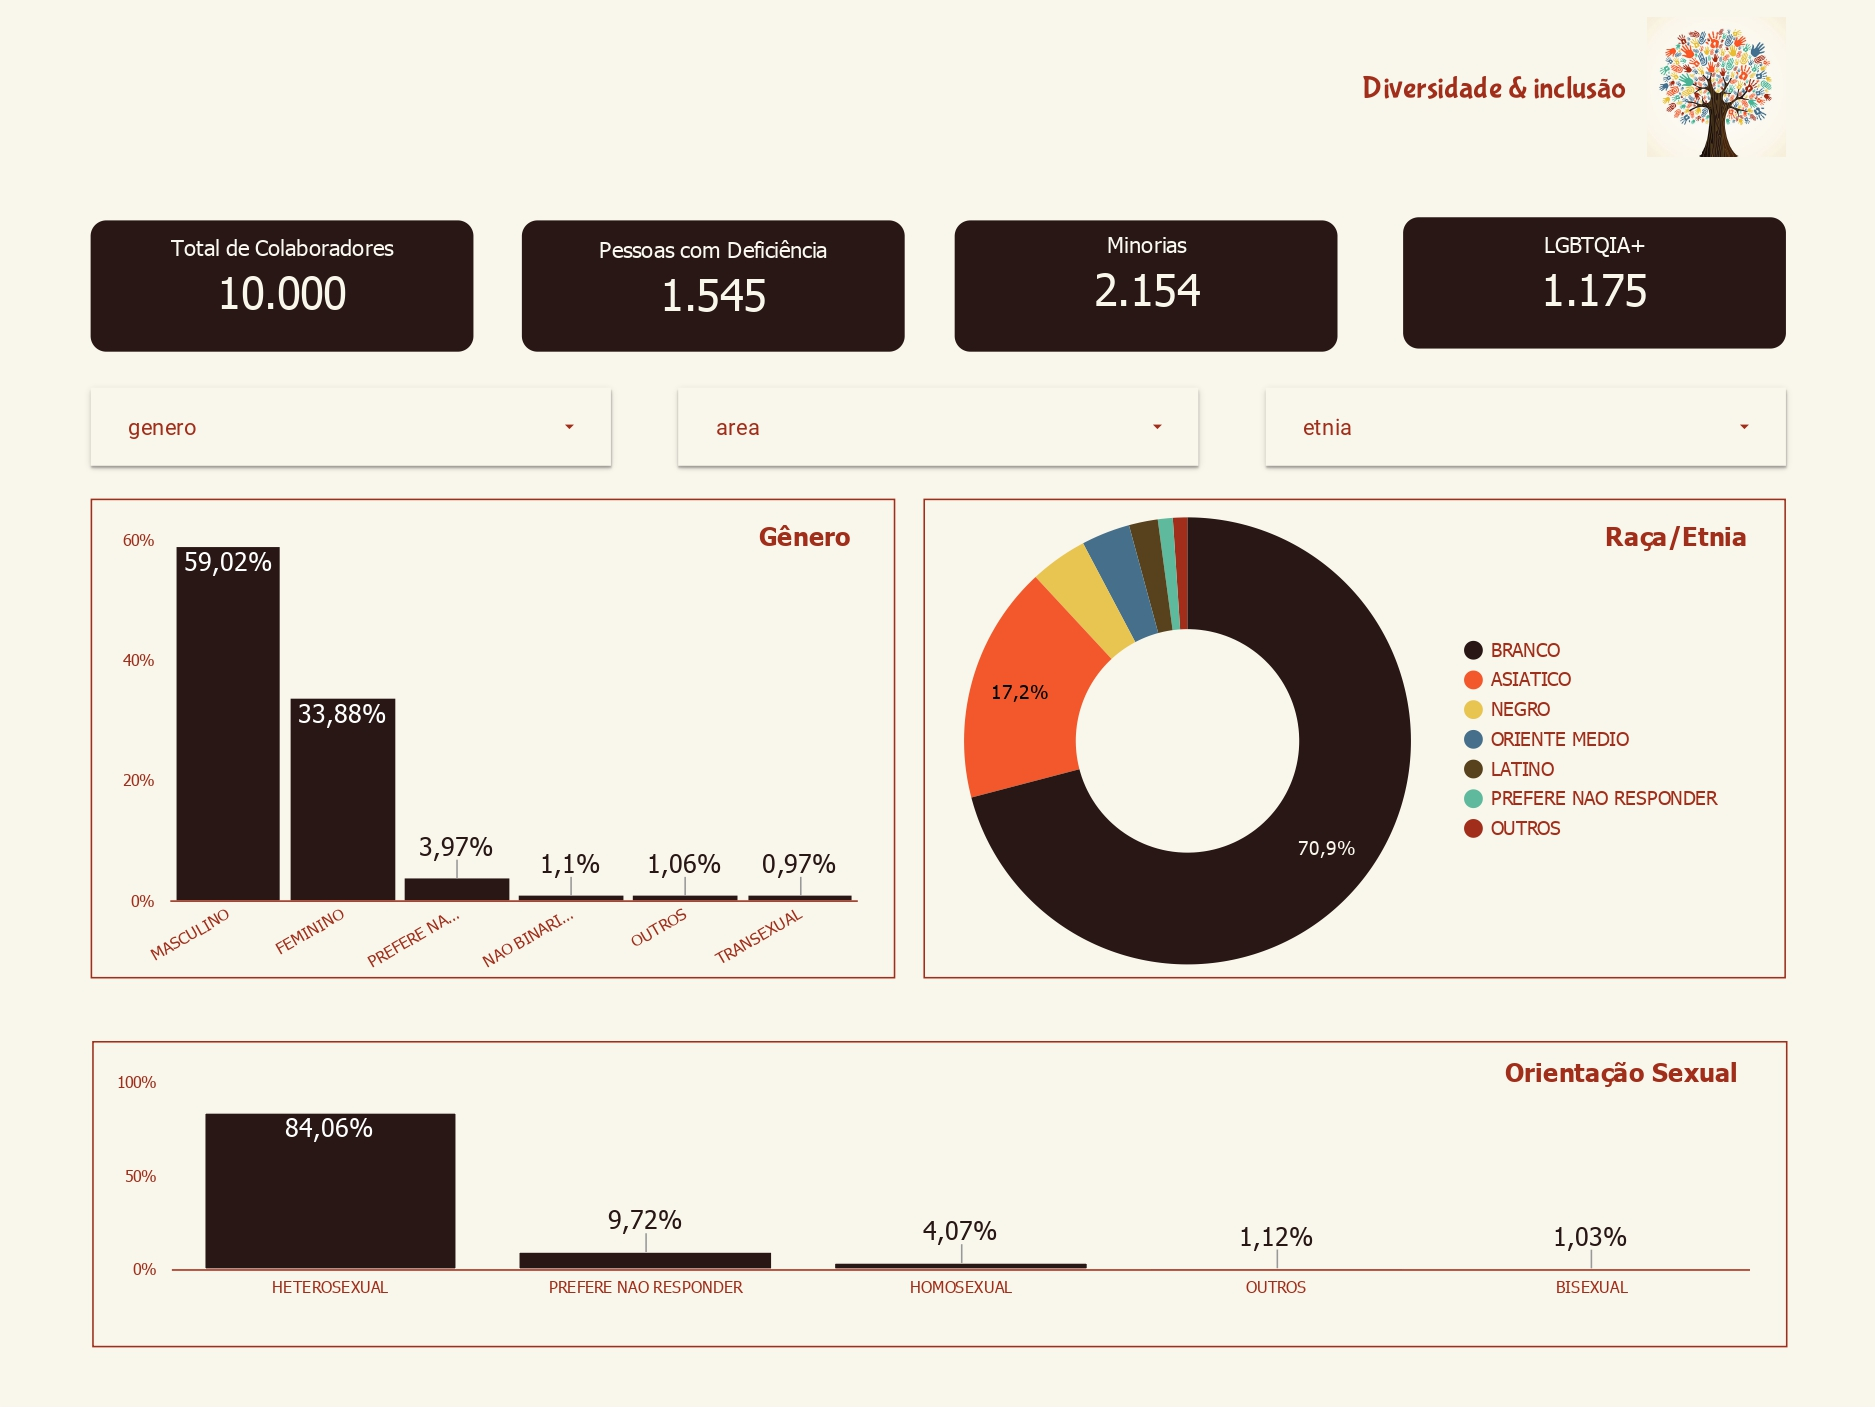

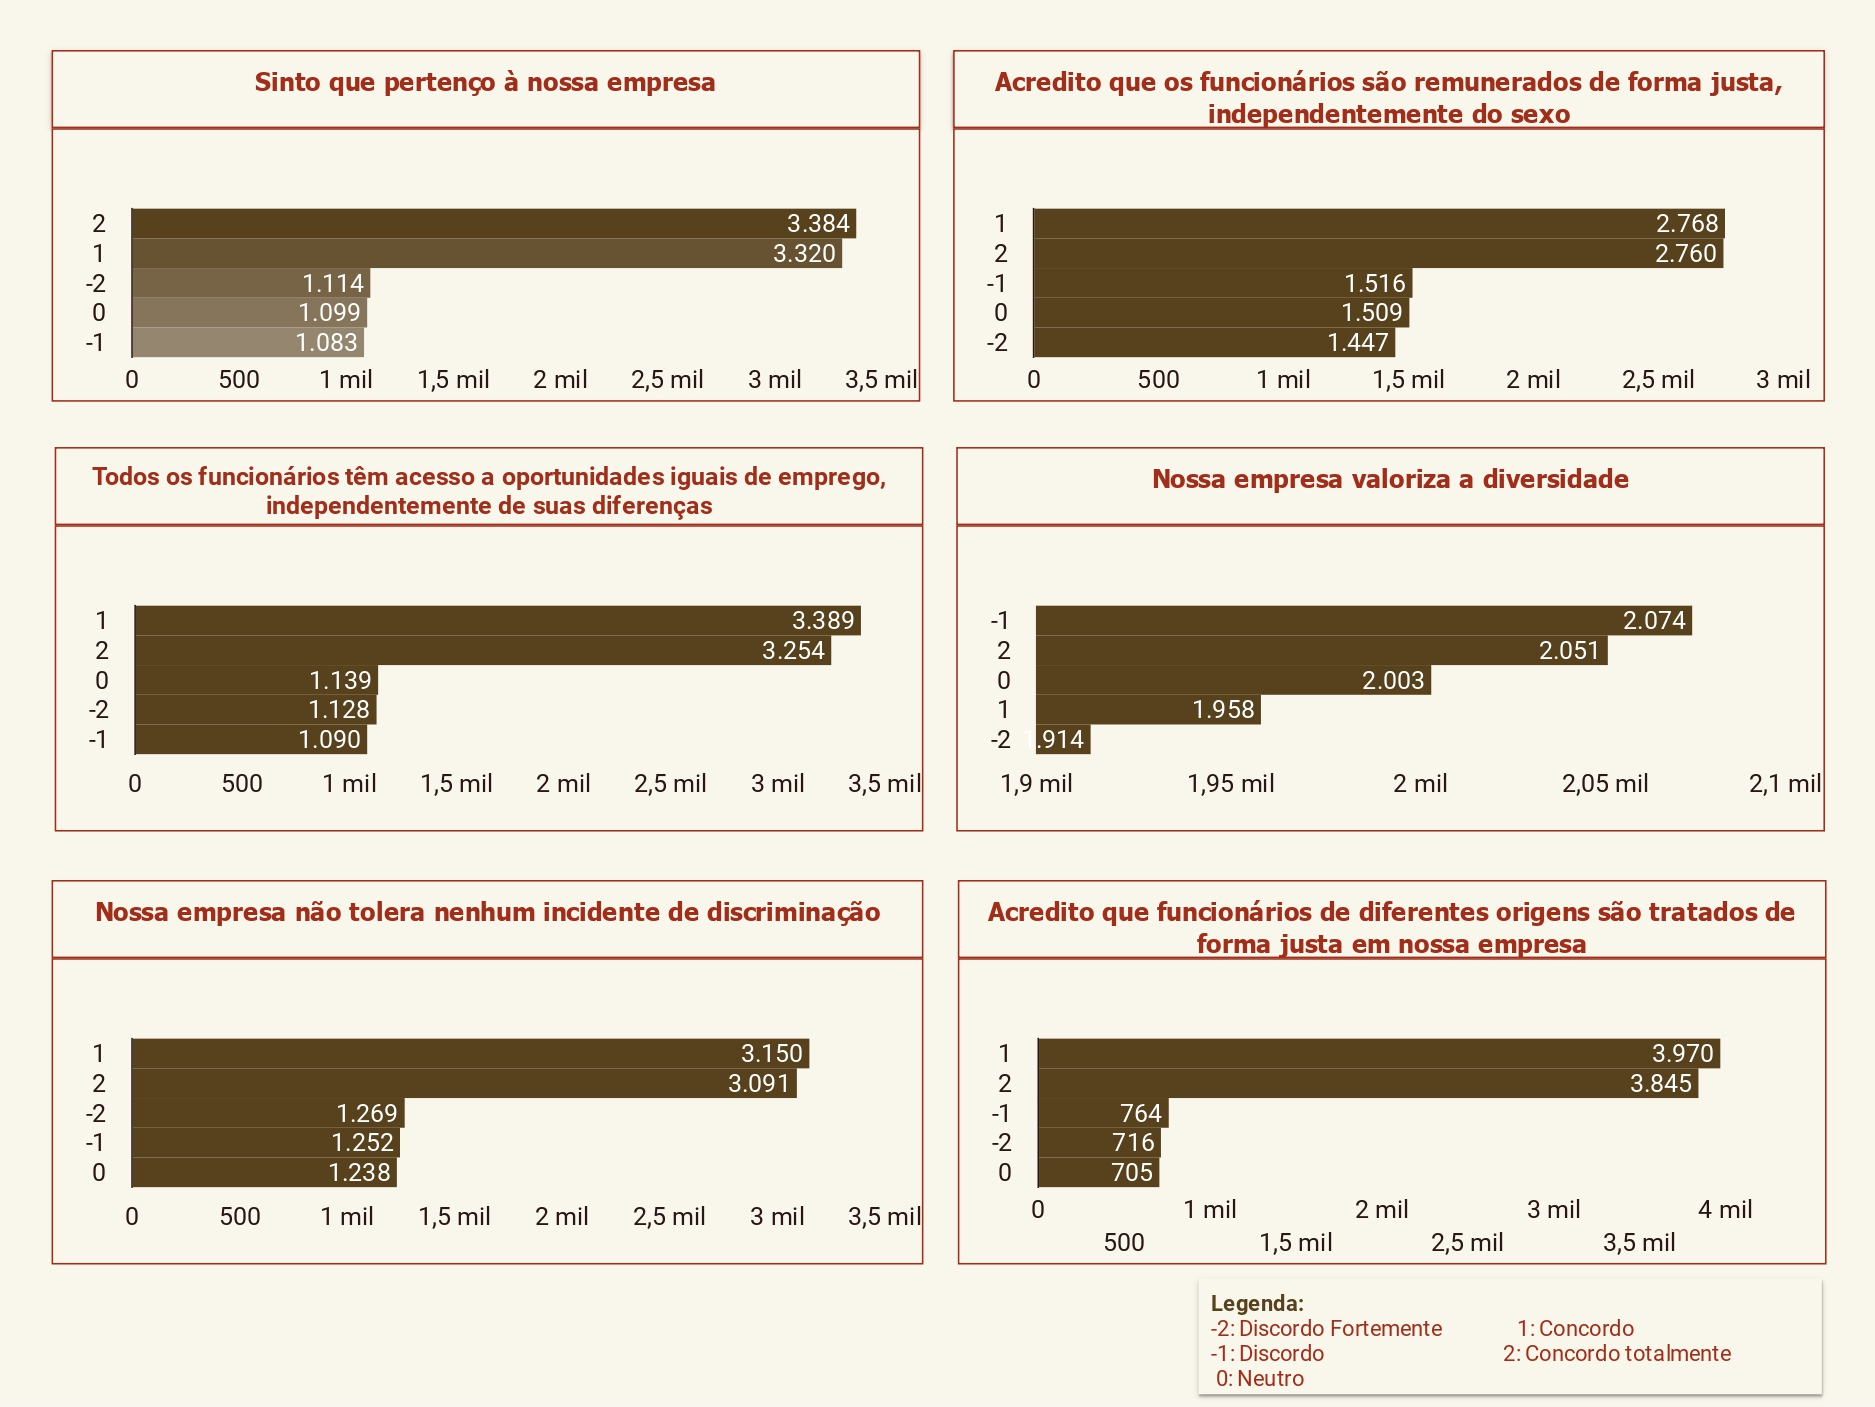